
MÁSTER BIG DATA & DATA ENGINEERING

Programación avanzada en Python

Autores: Luis Llana Díaz & Yolanda García Ruiz



# Trabajo final

## Nota Preliminar

Antes de desarrollar el proyecto, es aconsejable leer el enunciado completamente, incluyendo las instrucciones de entrega y otros consejos que se  recogen al final de este enunciado.
En este enunciado se pueden producir cambios durante su desarrollo por distintos motivos: porque se descubre una situación anómala que no ha sido prevista al preparar el enunciado, porque algún estudiante encuentre un error o ambigüedad en la descripción o en los datos de partida o por cualquier otra causa. Esto ocurre también en cualquier proyecto real, así que tomárselo con el mejor talante y aprender también de estas eventuales contingencias. Se procurará informar debidamente del mejor modo posible cuando esto se produzca.


## Introducción

En el portal de datos abiertos de la EMT de Madrid se puede encontrar abundante información sobre transporte y movilidad de la ciudad. En particular los datos relativos a la utilización del servicio de bicicletas eléctricas del ayuntamiento de Madrid.
La dirección del portal mencionado es la siguiente:

https://opendata.emtmadrid.es/Home

y el enlace donde se encuentran los datos relativos a BiciMAD es el siguiente:

https://opendata.emtmadrid.es/Datos-estaticos/Datos-generales-(1)

En esta página podemos encontrar los datos de uso de BiciMAD por meses desde abril de 2019 hasta el mes Febrero de 2023. Se trata de un conjunto de URLs a ficheros comprimidos ZIP, donde una vez descomprimidos, podemos encontrar un fichero en formato `csv`.
En esta práctica __solo nos va a interesar los datos de uso desde junio el 2021__. Son ficheros con nombre:

`
trips_YY_MM_monthName.csv
`

donde `YY` representa el año, `MM` representa el mes y `monthName` representa el nombre del mes en inglés.

Los datos del mes 10 del año 2021 está mal generado por la EMT, por lo que se pide que no se use ese fichero.

### Metadatos

En cada uno de los ficheros `csv` podemos encontrar los siguientes datos:

* `date` (Fecha): La fecha en la que tuvo lugar el viaje.
* `idbike` (ID de Bicicleta): El identificador único de la bicicleta utilizada para el viaje.
* `fleet` (Flota): La flota a la que pertenece la bicicleta utilizada.
* `trip_minutes` (Duración del Viaje en Minutos): La duración del viaje en minutos.
* `geolocation_unlock` (Geolocalización de Desbloqueo): Las coordenadas geográficas del lugar de inicio del viaje.
* `address_unlock` (Dirección de Desbloqueo): La dirección postal en la que se desbloqueó la bicicleta.
* `unlock_date` (Fecha y Hora de Desbloqueo): La fecha y hora exactas en las que comenzó el viaje.
* `locktype` (Tipo de Bloqueo): El estado de la bicicleta antes del viaje. Puede estar anclada en una estación o simplemente bloqueada en cualquier lugar libremente.
* `unlocktype` (Tipo de Desbloqueo): El estado de la bicicleta después del viaje.
* `geolocation_lock` (Geolocalización de Bloqueo): Las coordenadas geográficas del lugar final del viaje.
* `address_lock` (Dirección de Bloqueo): La dirección postal en la que se bloqueó la bicicleta.
* `lock_date` (Fecha y Hora de Bloqueo): La fecha y hora exactas en las que finalizó el viaje.
* `station_unlock` (Número de Estación de Desbloqueo): El número de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
* `dock_unlock` (Muelle de Desbloqueo): El muelle de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
*  `unlock_station_name` (Nombre de la Estación de Desbloqueo): El nombre de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
* `station_lock` (Número de Estación de Bloqueo): El número de la estación en la que la bicicleta estaba anclada después del viaje, si la había.
* `dock_lock` (Muelle de Bloqueo): El muelle de la estación en la que la bicicleta estaba anclada después del viaje, si la había.
* `lock_station_name` (Nombre de la Estación de Bloqueo): El nombre de la estación en la que la bicicleta estaba anclada después del viaje, si la había.

## Librerías

Importar todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.

In [1]:
import requests,certifi
import zipfile
import io
import pandas as pd
import truststore
truststore.inject_into_ssl()   # <- activa el almacén del sistema


## ETAPA 1. Análisis exploratorio y consultas.



### La descarga de los ficheros

En este notebook vamos a estudiar únicamente los datos de febrero de 2023.
La URL que permite descargar dichos datos es la siguiente:

In [2]:
url = "https://antares.sip.ucm.es/luis/bicimad/bicimad_2023/trips_23_02_February-csv.zip"

Observa que en la URL aparece la cadena `trips_23_02`, y que el fichero ZIP tiene un archivo de datos en formato csv llamado `trips_23_02_February.csv`.


__Se pide:__
 Escribir una función llamada `csv_from_zip` que reciba como único argumento un string que represente la URL al fichero ZIP de datos de uso y devuelva un fichero en formato CSV. El tipo del objeto devuelto es `TextIO`. La función  lanzará una excepción de tipo `ConnectionError` en caso de que falle la petición al servidor de la EMT.

__Observaciones:__
En el notebook `05_ficheros` del módulo de `Secuencias` se habla del manejo de ficheros en formato ZIP, y de cómo leer un fichero, transformarlo en una cadena de caracteres para posteriormente, usando el método `String.IO`, obtener un fichero de texto.
Deberás importar el módulo `typing`.

In [3]:
def csv_from_zip(url: str):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Lanza HTTPError si no es 2xx
    except requests.RequestException as e:
        raise ConnectionError(f"Error al conectar con el servidor de la EMT: {e}")

    # Leer el contenido del ZIP en memoria
    zip_bytes = io.BytesIO(response.content)

    with zipfile.ZipFile(zip_bytes) as z:
        # Buscar archivos CSV dentro del ZIP
        csv_files = [f for f in z.namelist() if f.lower().endswith('.csv')]
        if not csv_files:
            raise ValueError("El archivo ZIP no contiene ningún fichero CSV.")

        # Abrir el primer CSV y envolverlo como TextIO
        csv_file = z.open(csv_files[0])
        print("El método se ejecutó correctamente\n")
        return io.TextIOWrapper(csv_file, encoding='utf-8')


In [4]:
# Prueba
contenido = csv_from_zip(url).read() 
csvfile = io.StringIO(contenido)
print(contenido[:1000])


El método se ejecutó correctamente

fecha;idBike;fleet;trip_minutes;geolocation_unlock;address_unlock;unlock_date;locktype;unlocktype;geolocation_lock;address_lock;lock_date;station_unlock;dock_unlock;unlock_station_name;station_lock;dock_lock;lock_station_name
;;;;;;;;;;;;;;;;;
2023-02-01;7337;1;5.52;{'type': 'Point', 'coordinates': [-3.6956178, 40.4132798]};'Calle Jesús nº 1';2023-02-01T00:00:10;STATION;STATION;{'type': 'Point', 'coordinates': [-3.7088337, 40.4112744]};'Plaza de la Cebada nº 16 ';2023-02-01T00:05:41;31;3;27 - Huertas;43;3;39 - Plaza de la Cebada
;;;;;;;;;;;;;;;;;
2023-02-01;5098;1;0.32;{'type': 'Point', 'coordinates': [-3.7022591, 40.4056107]};'Glorieta de Embajadores nº 2';2023-02-01T00:00:25;STATION;STATION;{'type': 'Point', 'coordinates': [-3.7022591, 40.4056107]};'Glorieta de Embajadores nº 2';2023-02-01T00:00:44;52;22;48 - Embajadores 2;52;22;48 - Embajadores 2
;;;;;;;;;;;;;;;;;
2023-02-01;6519;1;0.27;{'type': 'Point', 'coordinates': [-3.6894193, 40.4166834]};'C

### Creación del dataframe de datos

__Se pide:__
Crear una función llamada `get_data` que reciba como único argumento un fichero csv y que devuelva un objeto de tipo DataFrame con las siguientes restricciones:
* El índice del dataframe debe ser a fecha en la que tuvo lugar el viaje (usa el argumento `index_col`).
* Todas las fechas que aparecen en los datos ha de tener tipo `datetime` (usa el argumento 'parse_dates`).
* De todas las columnas que hay en el fichero, solo nos interesan las siguientes:

   ```
     [ 'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'unlock_date', 'locktype',
     'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock', 'unlock_station_name',
     'station_lock', 'lock_station_name']
   ```

por lo que el dataframe ha de tener solo dichas columnas.

__Observaciones:__ Observa que los datos de usos que publica la EMT son fichero CSV donde el separador de campos es el símbolo `;`.

In [5]:
def get_data(csv_file):
    columnas_interes = [
        'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'unlock_date',
        'locktype', 'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date',
        'station_unlock', 'unlock_station_name', 'station_lock', 'lock_station_name'
    ]

    # Cargar el DataFrame cumpliendo las condiciones:
    df = pd.read_csv(
        csv_file,
        sep=';',                             # Separador ';' como en los archivos de EMT
        usecols=columnas_interes,                  # Solo las columnas requeridas
        index_col='unlock_date',                   # Índice: la fecha de desbloqueo
        parse_dates=['unlock_date', 'lock_date']   # Convertir columnas de fecha a tipo datetime
    )
    # Convertir índice a solo fecha (sin hora)
    df.index = df.index.date

    # Renombrar el índice a 'fecha'
    df.index.name = 'fecha'

    return df

In [6]:

csvfile = io.StringIO(contenido)
usos = get_data(csvfile)
usos.head()

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2023-02-01,7337.0,1.0,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01 00:05:41,31.0,27 - Huertas,43.0,39 - Plaza de la Cebada
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2023-02-01,5098.0,1.0,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01 00:00:44,52.0,48 - Embajadores 2,52.0,48 - Embajadores 2
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


### Explorar la estructura de los datos en el dataframe

El método `info` devuelve información acerca de la estructura de un dataframe.

__Se pide:__
Escribe el código necesario para crear un dataframe llamado `usos` a partir de la url "https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx".
Ejecuta el método `info()` sobre el dataframe y comenta los resultados.
Fíjate en las columnas que representan fechas y comprueba su tipo de datos. ¿Cuántas filas se han cargado?. Fíjate en los valores distintos de `NaN` en cada una de las columnas.

In [7]:
contenido = csv_from_zip(url).read() 
csvfile = io.StringIO(contenido)
usos= get_data(csvfile)
usos.info()

El método se ejecutó correctamente

<class 'pandas.core.frame.DataFrame'>
Index: 336988 entries, NaT to 2023-02-18
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idBike               168494 non-null  float64       
 1   fleet                168494 non-null  float64       
 2   trip_minutes         168494 non-null  float64       
 3   geolocation_unlock   168494 non-null  object        
 4   address_unlock       168494 non-null  object        
 5   locktype             168494 non-null  object        
 6   unlocktype           168494 non-null  object        
 7   geolocation_lock     168494 non-null  object        
 8   address_lock         168494 non-null  object        
 9   lock_date            168494 non-null  datetime64[ns]
 10  station_unlock       168114 non-null  float64       
 11  unlock_station_name  168114 non-null  object        
 12  station_lock         168018 non-nul

# RESPUESTA

### Datos generales

El DataFrame contiene 336,988 registros distribuidos en 14 columnas. El índice está basado en fechas, aunque algunos valores aparecen como `NaN` y `NaT`.
De todos los registros, solo alrededor de la mitad (≈168 mil) tienen información completa. Esto indica que será necesario manejar valores faltantes en varias columnas, especialmente en identificadores y estaciones.

#### Tipos de columnas

La columna `lock_date` está en formato de fecha y hora, lo que permitirá realizar análisis por periodos de tiempo, detectar patrones de uso y comparar entre distintos días o meses.

Los viajes cuentan con datos de ubicación tanto en forma de coordenadas (`geolocation_unlock`, `geolocation_lock`) como de estaciones (ID y nombre de desbloqueo/bloqueo). Esto abre la posibilidad de hacer análisis espaciales, pero también implica limpiar y estandarizar la información.

Existen columnas que describen cómo se interactuó con la bicicleta: `locktype` y `unlocktype`, que pueden ser útiles para entender los distintos modos de acceso y cierre.

### Borrado de valores NaN.

El método  `dropna` de los DataFrames tiene un argumento `how` que permite indicar que se borren filas o columnas donde todos los valores son `NaN`.

__Se pide:__ Crear una función llamada `delete_nan_rows` que borre las filas con todos sus valores `NaN` de un dataframe recibido como argumento. La función modifica el dataframe y no devuelve nada.  

Comenta los resultados. Prueba la función `delete_nan_rows` con el dataframe `usos`. Comprueba que el número de filas del dataframe `usos` ha cambiado. Puedes volver a ejecutar el método `info` y compáralo con el resultado antes de invocar a la función `delete_nan_rows`.

In [8]:
def delete_nan_rows(df):
    """
    Elimina las filas que donde todos sus valores son NaN.
    """
    df.dropna(how="all", inplace=True)


In [9]:
delete_nan_rows(usos)
usos.info()
usos.head()

<class 'pandas.core.frame.DataFrame'>
Index: 168494 entries, 2023-02-01 to 2023-02-18
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idBike               168494 non-null  float64       
 1   fleet                168494 non-null  float64       
 2   trip_minutes         168494 non-null  float64       
 3   geolocation_unlock   168494 non-null  object        
 4   address_unlock       168494 non-null  object        
 5   locktype             168494 non-null  object        
 6   unlocktype           168494 non-null  object        
 7   geolocation_lock     168494 non-null  object        
 8   address_lock         168494 non-null  object        
 9   lock_date            168494 non-null  datetime64[ns]
 10  station_unlock       168114 non-null  float64       
 11  unlock_station_name  168114 non-null  object        
 12  station_lock         168018 non-null  float64       
 13  lock_s

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,
2023-02-01,7337.0,1.0,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01 00:05:41,31.0,27 - Huertas,43.0,39 - Plaza de la Cebada
2023-02-01,5098.0,1.0,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01 00:00:44,52.0,48 - Embajadores 2,52.0,48 - Embajadores 2
2023-02-01,6519.0,1.0,0.27,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01 00:00:52,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura
2023-02-01,2551.0,1.0,8.58,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6991147, ...",'Calle Atocha nº 54',2023-02-01 00:09:28,52.0,48 - Embajadores 2,45.0,41 - Antón Martín
2023-02-01,6519.0,1.0,0.20,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01 00:01:09,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura




Ahora el DataFrame tiene unas **168 mil filas**,lo que confirma que se borraron todas las filas vacías.  
Las columnas siguen siendo las mismas y los **tipos de datos tampoco cambiaron**.  
El **peso en memoria** también bajó a la mitad.  
Todavía quedan algunas **columnas con valores nulos**, pero ya no hay filas completas vacías.  
 Esto lo sabemos fijándonos en la diferencia entre **'Non Null Count'** y **'Index entries'**. 

 

###  Exploración de las columnas.

La columna `fleet` representa el tipo de flota de bicicleta eléctrica.
Las BiciMAD Go son free floating y se corresponden con tipo de flota 2. A diferencia de las BiciMAD normales, no tienen por qué dejarse en una estación de bicicletas, aunque existe la posibilidad de hacerlo. Su bloqueo se realiza por medio de un candado manual, aspecto en el que se diferencian de las otras bicis municipales.

Por otro lado, las columnas `locktype` y `unlocktype` tienen información del tipo de bloqueo y desbloqueo respectivamente.

__Se pide:__
* ¿Cuántos valores distintos hay en la columna `fleet` del dataframe `usos`?
* ¿Cuántos valores distintos hay en las columnas `locktype` y `unlocktype` del dataframe `usos`?

In [10]:


for col in ["locktype", "unlocktype", "fleet"]:
    print(f"\nColumna: {col}")
    print(usos[col].unique())



Columna: locktype
['STATION' 'FREE']

Columna: unlocktype
['STATION' 'FREE']

Columna: fleet
[1. 2.]


### Cambio de tipo de datos

Las columnas  `idBike` y `fleet`  tienen tipo float, pero en realidad representan un identificador de bicicleta y de flota respectivamente.

__Se pide:__ Crear una función llamada `float_to_str` que cambie el tipo de una columna a tipo string. La función recibe como argumentos un dataframe y el nombre de una columna. La función no devuelve nada.
Si la columna no se encuentra entre las columnas del dataframe, la función no hace nada.

__Observaciones:__ Puedes usar la función `map` para aplicar la función de transformación.

Prueba la función con el datafame `usos` y  las columnas `idBike` y `fleet`.
De esta forma, el identificador de bicicleta `7337.0` pasará a ser `'7337'`. Ejecuta la función `info` sobre el dataframe `usos` para comprobar que los tipos asociados a esas columnas han cambiado.

In [11]:
def float_to_str(df,colname):
    if colname in df.columns:
        # Usamos map(str) para convertir valores a string
        df[colname] = df[colname].map(lambda x: str(int(x)) if pd.notna(x) else "Nan")


float_to_str(usos, "idBike")
float_to_str(usos, "fleet")

# df ya está modificado
usos.head()


,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,
2023-02-01,7337,1,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01 00:05:41,31.0,27 - Huertas,43.0,39 - Plaza de la Cebada
2023-02-01,5098,1,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01 00:00:44,52.0,48 - Embajadores 2,52.0,48 - Embajadores 2
2023-02-01,6519,1,0.27,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01 00:00:52,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura
2023-02-01,2551,1,8.58,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6991147, ...",'Calle Atocha nº 54',2023-02-01 00:09:28,52.0,48 - Embajadores 2,45.0,41 - Antón Martín
2023-02-01,6519,1,0.20,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01 00:01:09,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura


## Consultas

Las siguientes consultas se realizarán con el dataframe `usos` creado en los apartados anteriores.

### C1

¿Cuántas bicicletas han sido desbloqueadas de una estación y no se bloquean en ninguna?

In [12]:


bicis = usos.query("station_unlock.notna() and station_lock.isna()")["idBike"].nunique()
print(bicis)


71


### C2

Seleccionar solo las bicicletas del tipo de flota '1' . El nuevo dataframe se ha de llamar `regular_fleet`.

In [13]:
regular_fleet = usos[usos["fleet"] == "1"]

# Comprobamos el resultado
regular_fleet.head()


,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,
2023-02-01,7337,1,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01 00:05:41,31.0,27 - Huertas,43.0,39 - Plaza de la Cebada
2023-02-01,5098,1,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01 00:00:44,52.0,48 - Embajadores 2,52.0,48 - Embajadores 2
2023-02-01,6519,1,0.27,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01 00:00:52,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura
2023-02-01,2551,1,8.58,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6991147, ...",'Calle Atocha nº 54',2023-02-01 00:09:28,52.0,48 - Embajadores 2,45.0,41 - Antón Martín
2023-02-01,6519,1,0.20,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01 00:01:09,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura


### C3

Crea una función llamada `day_time` para calcular las horas totales de uso de bicicletas por día del mes.
La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de horas.

Prueba la función anterior con el dataframe  `usos`.

__Opcional:__ Dibuja un diagrama de barras con el resultado de la función `day_time` sobre el dataframe `usos`. Utiliza el módulo `matplotlib.pyplot`.

In [20]:

import matplotlib.pyplot as plt

def day_time(df):
    # Agrupar por el índice (que es la fecha) y sumar los minutos
    horas_por_dia = df['trip_minutes'].groupby(df.index).sum()

    # Convertir minutos a horas
    return horas_por_dia

import matplotlib.pyplot as plt

def graficar_uso_diario(horas_por_dia):
    plt.figure(figsize=(12, 6))
    horas_por_dia.plot(kind='bar')
    plt.title("Horas totales de uso por día")
    plt.xlabel("Fecha")
    plt.ylabel("Horas")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [21]:

dfhoras= day_time(usos)
dfhoras.head(30)
dfhoras.info()


<class 'pandas.core.series.Series'>
Index: 18 entries, 2023-02-01 to 2023-02-18
Series name: trip_minutes
Non-Null Count  Dtype  
--------------  -----  
18 non-null     float64
dtypes: float64(1)
memory usage: 288.0+ bytes


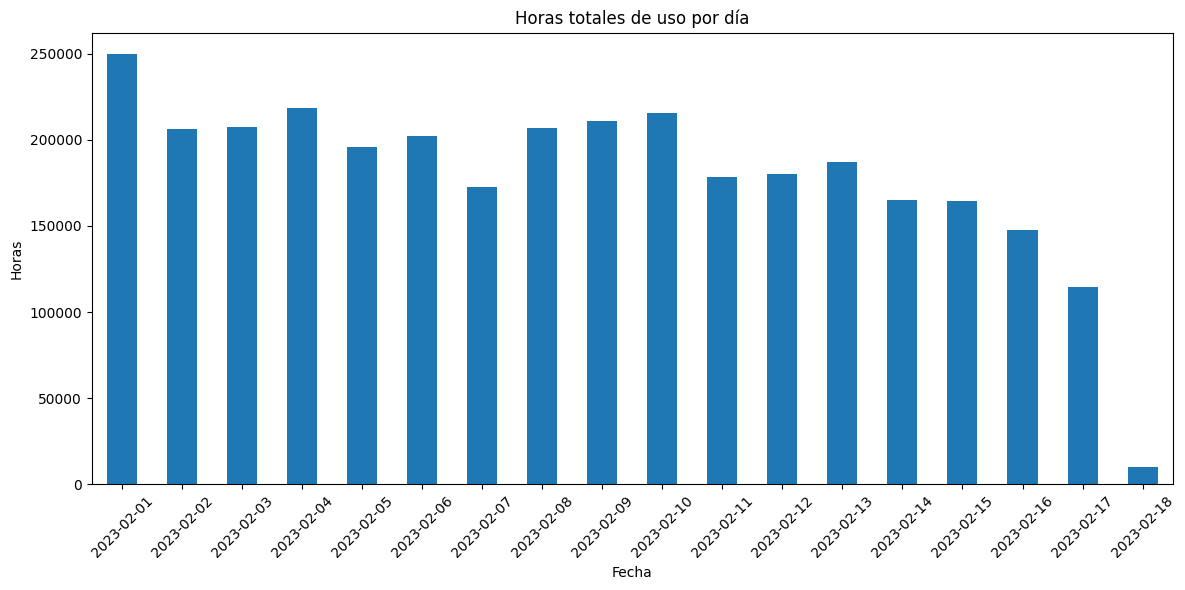

In [22]:
graficar_uso_diario(dfhoras)

### C4

Crea una función llamada `weekday_time` para calcular las horas totales de uso de bicicletas por día de la semana. La función recibe un dataframe y devuelve una Serie donde el índice es el día de la semana (L, M, X, J, V, S, D) y el valor es el número de horas.

Prueba la función anterior con el dataframe usos.



In [23]:
def weekday_time(df):
    # Reutilizamos la función day_time para obtener horas por día (fecha exacta)
    horas_por_dia = day_time(df)

    # Convertir el índice a datetime (por si no lo es todavía)
    horas_por_dia.index = pd.to_datetime(horas_por_dia.index, errors="coerce")
    
    # Agrupar por día de la semana del índice
    horas_por_semana = horas_por_dia.groupby(horas_por_dia.index.dayofweek).sum()

    # Mapear números de día a letras
    dias = {0:'L', 1:'M', 2:'X', 3:'J', 4:'V', 5:'S', 6:'D'}
    horas_por_semana.index = horas_por_semana.index.map(dias)

    # Reordenar de L a D
    return horas_por_semana.reindex(['L','M','X','J','V','S','D']).fillna(0)

In [24]:
dfweek = weekday_time(usos)
dfweek.head(20)

fecha
L    389669.31
M    337586.44
X    620979.58
J    564758.72
V    537496.44
S    406861.78
D    376053.73
Name: trip_minutes, dtype: float64

### C5

Crea una función llamada `total_usage_day` para calcular el número total de usos de bicicletas por día del mes. La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de usos.

Prueba la función anterior con el dataframe usos.



In [25]:

def total_usage_day(df):

    # Aseguramos que el índice es datetime
    df.index = pd.to_datetime(df.index, errors="coerce")

    # Contar filas por cada fecha (cada fila = 1 uso)
    usos_por_dia = df.groupby(df.index.date).size()

    return usos_por_dia

In [26]:
total_usage_day(usos)

2023-02-01    11442
2023-02-02    11069
2023-02-03    10166
2023-02-04     8903
2023-02-05     8026
2023-02-06    10118
2023-02-07     8986
2023-02-08    10576
2023-02-09    10814
2023-02-10    10579
2023-02-11     8383
2023-02-12     7801
2023-02-13     9802
2023-02-14    10341
2023-02-15    10766
2023-02-16     9684
2023-02-17    10067
2023-02-18      971
dtype: int64

### C6

Calcular el total de usos por fecha y estación de desbloqueo. Como la fecha está en el índice y la estación de desbloqueo es una columna, lo mejor es agrupar por la columna `station_unlock` y  un objeto `Grouper` de frecuencia diaria (1D).

A continuación, se muestra un ejemplo del funcionamiento de la función Grouper de pandas:
```
>>> df
             ID  Price
2000-01-02   0     10
2000-01-02   1     20
2000-01-09   2     30
2000-01-16   3     40

# Grouper con frecuencia semanal (1W)
>>> df.groupby(pd.Grouper(freq="1W")).mean()
               ID  Price

2000-01-02    0.5   15.0
2000-01-09    2.0   30.0
2000-01-16    3.0   40.0
```

In [27]:
df_agrupado = usos.groupby([pd.Grouper(freq='1D'), 'station_unlock']).size().reset_index(name='usos')
df_agrupado.head(20)


,fecha,station_unlock,usos
0,2023-02-01,1.0,31
1,2023-02-01,2.0,23
2,2023-02-01,3.0,39
3,2023-02-01,4.0,27
4,2023-02-01,5.0,26
5,2023-02-01,6.0,50
6,2023-02-01,7.0,57
7,2023-02-01,8.0,48
8,2023-02-01,9.0,66
9,2023-02-01,10.0,33


### C7

Se quiere averiguar la dirección de las estaciones de desbloqueo que a lo largo del mes han tenido un mayor número de viajes. Crear una función llamada `most_popular_stations` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un conjunto con la dirección de las estaciones.



In [28]:
def most_popular_stations(df, n=1):
    # Contamos cuántos viajes se han hecho desde cada dirección
    conteo = df['address_unlock'].value_counts()

    # Tomamos las n primeras estaciones con más viajes
    top_n = conteo.head(n).index

    # Las devolvemos como conjunto
    return set(top_n)

In [29]:
most_popular_stations(usos, 3)

{"'Calle Princesa nº 5'",
 "'Calle Valencia nº 1'",
 "'Plaza de la Cebada nº 16 '"}

### C8

Se quiere averiguar el  número de usos de las estaciones de desbloqueo que a lo largo del mes ha tenido un mayor número de viajes. Crear una función llamada `usage_from_most_popular_station` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un entero.

In [30]:
def usage_most_popular_stations_df(df, n):
    conteo = df['address_unlock'].value_counts().head(n)
    return conteo.reset_index().rename(columns={'index': 'direccion', 'address_unlock': 'viajes'})


In [31]:
usage_most_popular_stations_df(usos, 3)

,viajes,count
0,'Plaza de la Cebada nº 16 ',2189
1,'Calle Princesa nº 5',1922
2,'Calle Valencia nº 1',1789


# ETAPA 2: Construcción del módulo bicimad

En esta sección se proporcionan algunas instrucciones para la creación del módulo `bicimad`.
La gran mayoría de métodos y funciones pedidas aquí, se han implementado de alguna manera en la sección anterior, por lo que la construcción del módulo y las clases que se pide a continuación es en gran medida una reorganización de código. El módulo `bicimad` debe exportar las clases `UrlEMT` y `BiciMad` descritas a continuación.



## Clase `UrlEMT`

Vamos a crear una clase que permita recopilar todos los enlaces que hay en la web de la EMT (https://opendata.emtmadrid.es/Datos-estaticos/Datos-generales-(1)), que se corresponden con datos de uso de bicicletas desde Junio de 2021. Los enlaces que cumplen esta restricción son los que denominaremos a partir de ahora _enlaces válidos_. Estos enlaces contienen la cadena `trips_YY_MM_monthName.csv` donde `YY` representa el año, `MM` representa el mes y `monthName` representa el nombre del mes en inglés.


__Requisitos:__

* La clase ha de contener dos constantes de clase:
```
EMT = 'https://opendata.emtmadrid.es/'
GENERAL = "/Datos-estaticos/Datos-generales-(1)"
```

* Los objetos de la clase tienen un único atributo privado que representa el conjunto enlaces válidos que se encuentran en el sitio web de la EMT.

* Ha de contener al menos los siguientes métodos:

    * `__init__`: método constructor sin argumentos.
    * `select_valid_urls`: método estático que se encarga de actualizar el atributo de los objetos de la clase. Devuelve un conjunto de enlaces válidos. Si la petición al servidor de la EMT devuelve un código de retorno distinto de 200, la función lanza una excepción de tipo `ConnectionError`.
    
    * Para extraer los enlaces hay que definir una funcion `get_links` que tome como parámetros un texto HTML y devuelva un conjunto con todos los enlaces.
    Esta función debe usar expresiones regulares para encontrar los enlaces.

    * `get_url`: método de instancia que acepta los argumentos de tipo entero `month` y `year` y devuelve el string de la URL correspondiente al mes `month` y año `year`.  Si no existe un enlace válido correspondiente al mes `month` y año `year`, se lanzará una excepción de tipo `ValueError`. Se deberá comprobar que el mes y año se corresponden con valores válidos (`month` entre 1 y 12, `year` entre 21 y 23).

    * `get_csv`: método de instancia que acepta los argumentos de tipo entero `month` y `year` y devuelve  un fichero en formato CSV correspondiente al mes `month` y año `year`.
     El tipo del objeto devuelto es TextIO. La función lanzará una excepción de tipo `ConnectionError` en caso de que falle la petición al servidor de la EMT. En este caso, se podrá aprovechar el código de la función `csv_from_ZIP` implementada en la sección anterior.




## Clase `BiciMad`

Vamos a crear una clase que represente los datos de uso de las bicicletas eléctricas en un mes concreto, junto con las operaciones necesarias para realizar la limpieza y el análisis básico que hemos realizado anteriormente.

__Requisitos:__

* Los objetos de la clase tienen  tres atributos privados que representan el mes, el año y los datos de uso extraídos de un fichero csv y representados mediante un dataframe de pandas.

* Ha de contener al menos los siguientes métodos:

    * `__init__`: método constructor. Acepta los argumentos de tipo entero `month` y `year`. El atributo que representa los datos, se actualiza al construir el objeto mediante el método estático `get_data`.
    * `get_data`: método estático que acepta los argumentos de tipo entero `month` y `year` y devuelve un objeto de tipo DataFrame con los datos de uso correspondientes al mes `month` y año  `year`. El índice del dataframe debe ser la fecha en la que tuvo lugar el viaje. Todas las fechas que aparecen en los datos ha de tener tipo `datetime`.  Las únicas columnas que tiene que tener el DataFrames son:

    ```
    [ 'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'unlock_date', 'locktype', 'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock',
    'unlock_station_name', 'station_lock', 'lock_station_name']
    ```
    * `data`: método decorado con el decorador `@property` para acceder al atributo que representa los datos de uso. El atributo ha de llamarse igual.
    * `__str__`: método especial que permite la representación informal del objeto. Su comportamiento es idéntico al método `__str__` de los objetos de la clase DataFrame.
    * `clean`: método de instancia que se encarga de realizar la limpieza  y transformación del dataframe que representa los datos. Modifica el dataframe y no devuelve nada. Realiza las siguientes tareas:
        * Borrado de valores NaN. Borrar las filas con todos sus valores NaN.
        * Cambiar el tipo de datos de las siguientes columnas del dataframe: `fleet`, `idBike`, `station_lock`, `station_unlock`. Dichas columnas han de ser de tipo `str`.
        
    En este caso, podrás aprovechar el código ya implementado en la sección anterior.
    * `resume`: método de instancia que devuelve un objeto de tipo Series con las siguientes restricciones:
        * el índice está formado con las etiquetas:
            'year', 'month',                                 'total_uses', 'total_time', 'most_popular_station', 'uses_from_most_popular'
        * los valores son: el año, el mes, el total de usos en dicho mes, el total de horas en dicho mes, el conjunto de estaciones de bloqueo con mayor número de usos y el número de usos de dichas estaciones.

    En este caso podrás aprovechar el código de las funciones implementadas en la sección de consultas.


## Tests

Define los tests que creas necesarios para comprobar que las clases funcionan correctamente. Los tests deberán estar en un directorio independiente, dentro del proyecto, pero no en el paquete que se distribuye.

## Cuaderno de jupyter

Además del proyecto, se deberá incluir un cuaderno jupyter con las consultas de la ETAPA 1. Pero en lugar de utilizar las funciones que se indican en ella, deberá usar la clase `Bicimad`.

# Entrega
La entrega consistirá en un fichero comprimido `zip` con lo siguiente:
- Fichero `whl` con el instalable del paquete generado
- Los ficheros del paquete desarrollado, incluyendo los tests.
- El cuaderno de jupyter con las consultas C1-C8 de la Etapa 1, usando la clase `BiciMad`

# Criterios de la corrección
Horas previstas para la realización de la práctica 15 horas.

- Correcto funcionamiento de las clases 40%
- Buena elección de tests para comprobar las clases 20%
- Correcta generación del paquete `whl` 10%
- Correcta documentación de las clases, métodos y funciones 10%
- Cuaderno jupyter 10%

In [ ]:
from bicimad import BiciMad


------------------